In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import seaborn as sns 
from sklearn import tree

In [3]:
data_set = pd.read_csv("./titanic_train.csv")

In [4]:
data_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data_set.shape

(891, 12)

In [6]:
summary = data_set.describe()

In [7]:
mean_age = summary.loc["mean", "Age"]

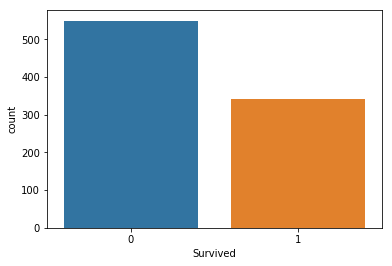

In [8]:
sns.countplot(x = "Survived", data = data_set)

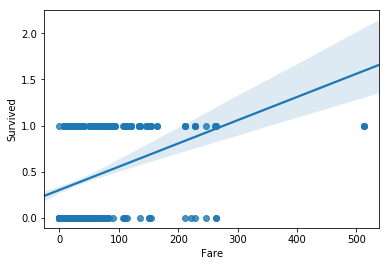

In [9]:
sns.regplot(y="Survived", x="Fare", data=data_set)

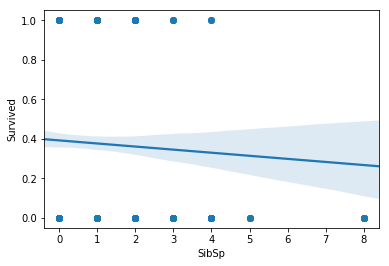

In [10]:
sns.regplot(y="Survived", x="SibSp", data=data_set)

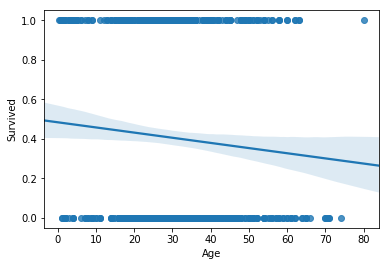

In [11]:
sns.regplot(y="Survived", x="Age", data=data_set)

In [12]:
data_set = data_set.drop(['PassengerId', 'SibSp', 'Name', 'Ticket', 'Cabin'], axis = 1)
data_set.Age.fillna(mean_age,inplace=True)

In [13]:
data_set[data_set.Embarked.isnull()].index

Int64Index([61, 829], dtype='int64')

In [14]:
data_set.Embarked.fillna("S",inplace=True)

In [16]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data_set['Embarked'])
embarked = le.transform(data_set['Embarked'])
le.fit(data_set['Sex'])
sex = le.transform(data_set['Sex'])

data_set = data_set.drop(['Embarked', 'Sex'], axis = 1)
data_set['Embarked'] = embarked
data_set['Sex'] = sex


In [17]:
data_set.head()

,Survived,Pclass,Age,Parch,Fare,Embarked,Sex
0,0,3,22.0,0,7.2500,2,1
1,1,1,38.0,0,71.2833,0,0
2,1,3,26.0,0,7.9250,2,0
3,1,1,35.0,0,53.1000,2,0
4,0,3,35.0,0,8.0500,2,1


In [20]:
X = data_set.drop("Survived", axis = 1)
y = data_set["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3)

In [58]:
dtree = tree.DecisionTreeClassifier(max_depth = 5)

In [59]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [60]:
dtree.predict(X_test)

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0])

In [61]:
from sklearn.metrics import accuracy_score, log_loss

train_predictions = dtree.predict(X_test)
acc = accuracy_score(y_test, train_predictions)
print("Accuracy: {:.4%}".format(acc))

Accuracy: 84.7015%


In [62]:
import graphviz 
dot_data = tree.export_graphviz(dtree, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("train") 

'train.pdf'

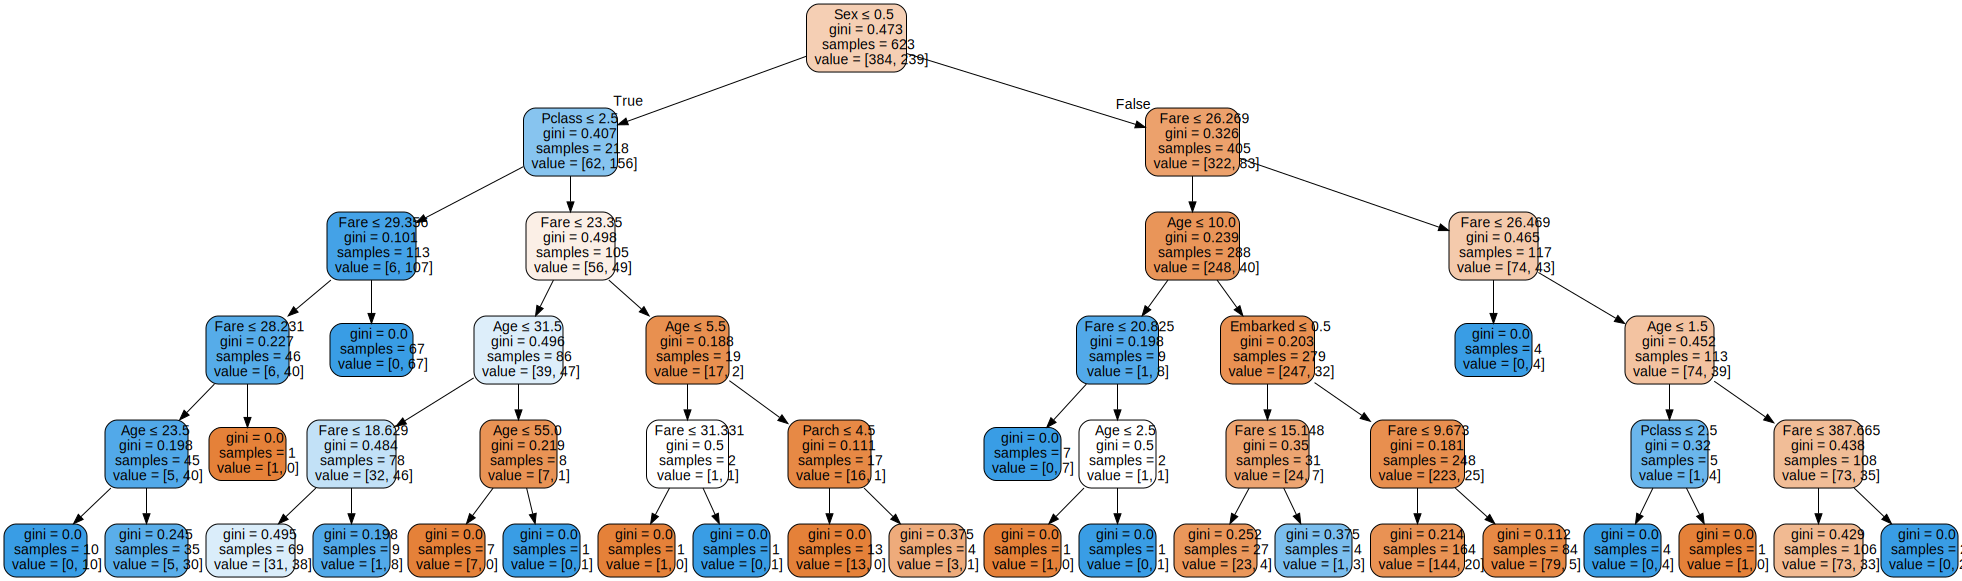

In [63]:
dot_data = tree.export_graphviz(dtree, out_file=None, feature_names = feature, filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 